# 주제 : 붓꽃 품종 구별
# 목적 : 꽃받침, 꽃잎의 길이와 폭을 이용하여 품종구별
# 제출처 : 

# 붓꽃품종분류기

- 꽃받침(Sepal), 꽃잎(Petal) 각각의 길이와 폭을 이용하여붓꽃의 품종을 출력하여라 

In [3]:
Image(url='https://t1.daumcdn.net/cfile/tistory/996F6F445AF85F1E27')

In [6]:
Image(url='https://t1.daumcdn.net/cfile/tistory/99CB703A5AF85F1F2C')

In [3]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))


In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 머신러닝 과정 

- 모듈 임포트 
- 데이타 수집 (학습데이타)
- 데이타 전처리 
- 데이터 학습 (모델화)
- 데이터 예측 (테스트데이타)
- 데이터 테스트 (정답률)

In [48]:
# 학습기 모듈 
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [27]:
# 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이타 수집 

- input/iris.csv

In [6]:
#데이터 파악하기
iris = pd.read_csv('data/iris.csv')
iris.info()
iris

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
iris.head(10)#상위 10개 확인하기

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
iris.Name.unique() #꽃 이름 종류 확인

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

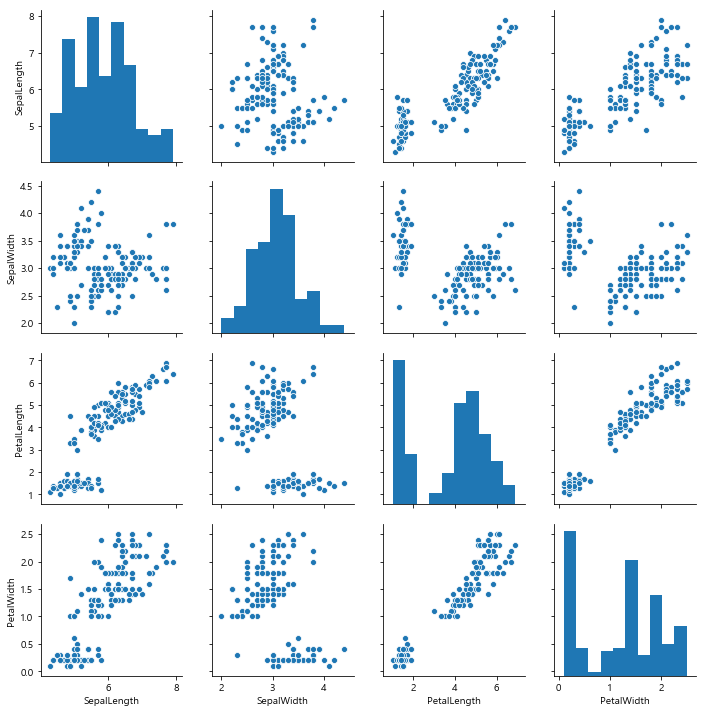

In [9]:
sns.pairplot(iris) #각 데이터 상관관계 파악
plt.show()

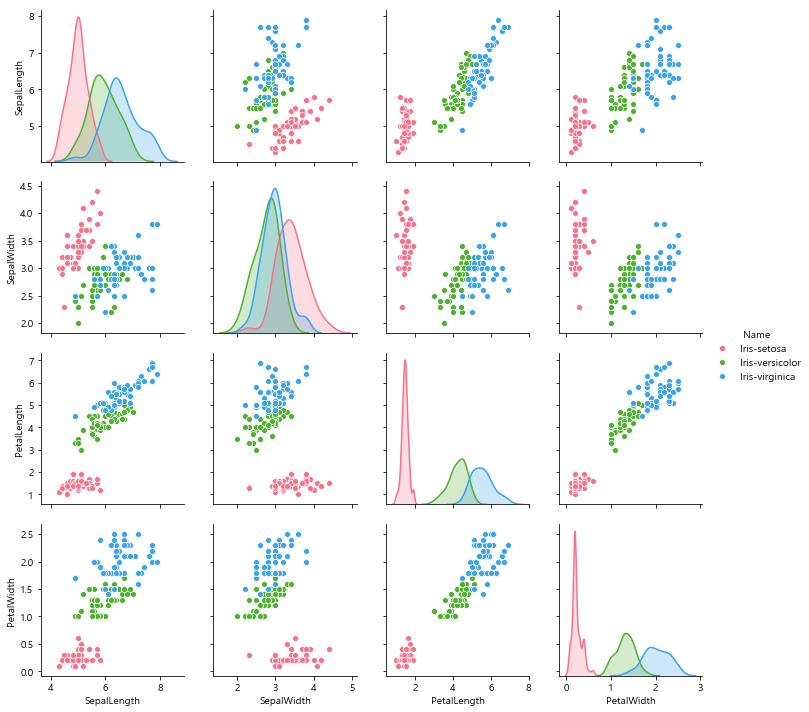

In [10]:
sns.pairplot(iris, hue="Name", palette="husl")

# 데이타 전처리 

In [11]:
# 컬럼 확인
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

In [15]:
x = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = iris.Name #x축은 컬럼으로 y축은 꽃이름으로

### 학습 전용과 테스트 전용 분리하기 

- 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
- 임포트 
    - from sklearn.model_selection import train_test_split

```
    train_test_split( data, label, 
                       test_size=float, train_size=float, 
                        shuffle=True/False)
```                    

In [16]:
# 데이터 70% 무작위로 입력하여 테스트, 나머지 30% 데이터로 정답률 확인
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, train_size=0.7, shuffle=True)

In [17]:
#데이터 수량 확인 (합쳐서 150개)
x_train.shape, x_test.shape

((105, 4), (45, 4))

In [19]:
x_train.head(), x_test.head()

(     SepalLength  SepalWidth  PetalLength  PetalWidth
 1            4.9         3.0          1.4         0.2
 121          5.6         2.8          4.9         2.0
 116          6.5         3.0          5.5         1.8
 103          6.3         2.9          5.6         1.8
 46           5.1         3.8          1.6         0.2,
      SepalLength  SepalWidth  PetalLength  PetalWidth
 10           5.4         3.7          1.5         0.2
 22           4.6         3.6          1.0         0.2
 149          5.9         3.0          5.1         1.8
 26           5.0         3.4          1.6         0.4
 102          7.1         3.0          5.9         2.1)

### 데이타 학습  : 모델링

In [20]:
# 학습 모델링 준비 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import  SVC

C:\Users\bitcamp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
m_svc = SVC()
m_svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 데이터 예측 

In [23]:
y_pred = model_svc.predict(x_test)

In [24]:
# 데이터 비교
com = pd.DataFrame([y_test, y_pred])

In [25]:
print("정답률 = " , accuracy_score(y_test, y_pred))

정답률 =  0.9777777777777777


In [26]:
iris[iris.Name=='Iris-setosa'].head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
model_svc.predict([[4.6, 3.1, 1.5, 0.3]])

array(['Iris-setosa'], dtype=object)

In [35]:
model_kne = KNeighborsClassifier()
model_kne.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
kne_y_pred = model_kne.predict(x_test)
kne_y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [37]:
model_random = RandomForestClassifier()
model_random.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
random_y_pred = model_random.predict(x_test)

In [41]:
print("정답률 = " , accuracy_score(y_test, random_y_pred))

정답률 =  0.9777777777777777


### 결과 확인 

metrics.accuracy_score(label, clf.predict(data))

In [42]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [45]:
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개로 분리, 각각의 정확도 확인
ifold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 data 크기:',features.shape[0])

붓꽃 data 크기: 150


In [51]:
num = 0
for train_index, test_index  in ifold.split(features):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    m_svc.fit(x_train , y_train)    
    y_pred = m_svc.predict(X_test)
    num += 1
   
    accuracy = np.round(accuracy_score(y_test,y_pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)
    
print('평균 검증 정확도:', np.mean(cv_accuracy)) 

5 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
5 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
5 교차 검증 정확도 :0.6667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
5 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
5 교차 검증 정확도 :0.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
5 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
5 교차 검증 정확도 :0.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
5 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
5 교차 검증 정확도 :0.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
평균 검증 정확도: 0.33333999999999997
